In [612]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [613]:
df=pd.read_csv('./dataset/Iris.csv')
# rename column names
df = df.rename(columns={'SepalLengthCm': 'sepal_length',
                        'SepalWidthCm': 'sepal_width',
                        'PetalLengthCm': 'petal_length',
                        'PetalWidthCm': 'petal_width',
                        'Species': 'species'})
# rename Iris species names
df['species'] = df['species'].replace({'Iris-setosa': 'setosa', 'Iris-versicolor': 'versicolor', 'Iris-virginica': 'virginica'})

df.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [614]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [615]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [616]:
# performs standardization on the petal length and width features in the iris dataset. 
# Standardization involves transforming the features to have zero mean and unit variance, 
# which can be useful for clustering algorithms because it puts all features on the same scale.
scalar = StandardScaler()
df[['petal_length_T', 'petal_width_T']] = scalar.fit_transform(df[['petal_length', 'petal_width']])
df.head(10)

,Id,sepal_length,sepal_width,petal_length,petal_width,species,petal_length_T,petal_width_T
0,1,5.1,3.5,1.4,0.2,setosa,-1.341272,-1.312977
1,2,4.9,3.0,1.4,0.2,setosa,-1.341272,-1.312977
2,3,4.7,3.2,1.3,0.2,setosa,-1.398138,-1.312977
3,4,4.6,3.1,1.5,0.2,setosa,-1.284407,-1.312977
4,5,5.0,3.6,1.4,0.2,setosa,-1.341272,-1.312977
5,6,5.4,3.9,1.7,0.4,setosa,-1.170675,-1.050031
6,7,4.6,3.4,1.4,0.3,setosa,-1.341272,-1.181504
7,8,5.0,3.4,1.5,0.2,setosa,-1.284407,-1.312977
8,9,4.4,2.9,1.4,0.2,setosa,-1.341272,-1.312977
9,10,4.9,3.1,1.5,0.1,setosa,-1.284407,-1.444450


In [617]:
def optimise_k_means(data, max_k):
    """Work out optimum number of clusters"""
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)
    
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of CLusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

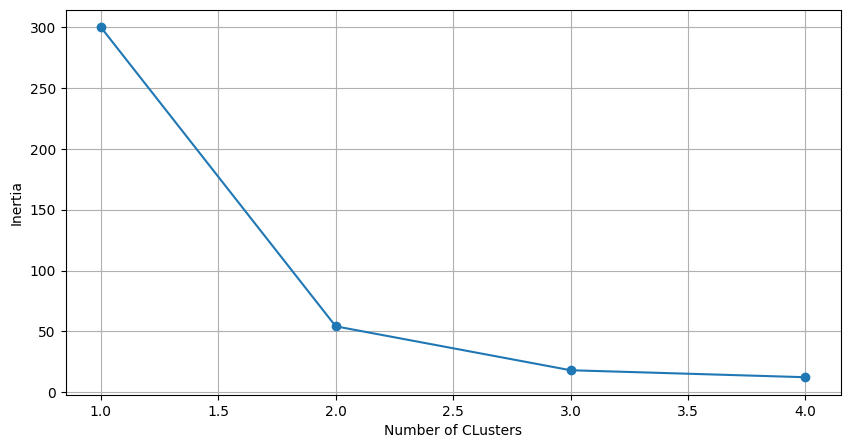

In [618]:
optimise_k_means(data=df[['petal_length_T', 'petal_width_T']], max_k=5)

In [619]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['petal_length_T', 'petal_width_T']])
df['kmeans_3'] = kmeans.labels_
df['kmeans_3']

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: kmeans_3, Length: 150, dtype: int32

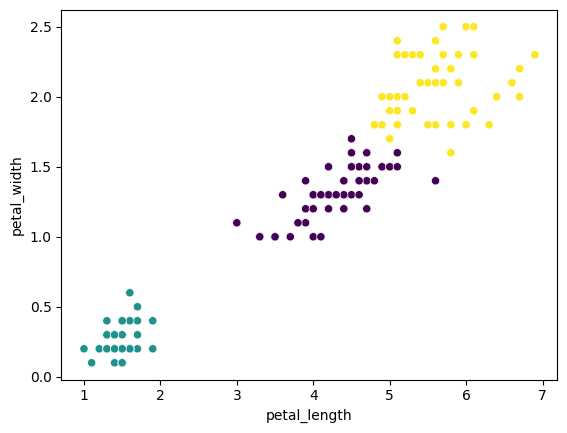

In [620]:
g = sns.scatterplot(x=df['petal_length'], y=df['petal_width'], c=df['kmeans_3'])

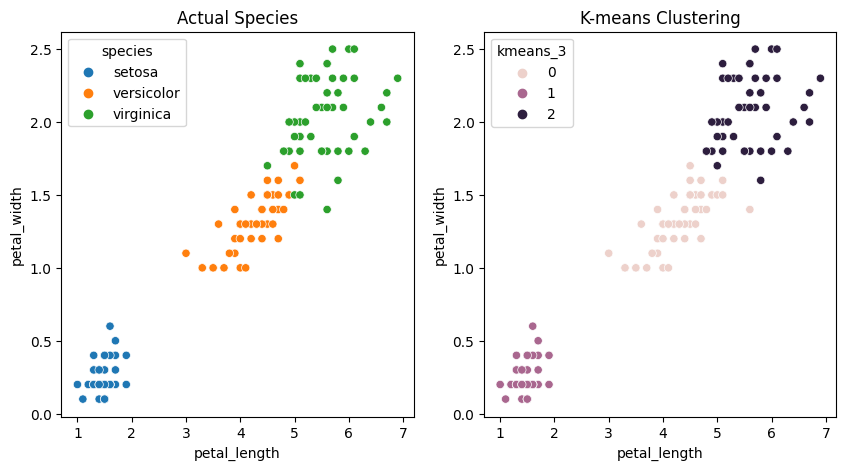

In [621]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
# Plot actual species groups
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', ax=ax[0])
ax[0].set_title('Actual Species')
# Plot k-means clustering groups
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='kmeans_3', ax=ax[1])
ax[1].set_title('K-means Clustering')

plt.show()

#### Accuracy of mine k-means clustering versus the actual species cluster

In [622]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import adjusted_rand_score

In [623]:
# Convert the actual species labels to numerical labels
encoder = LabelEncoder()
actual_species_labels = encoder.fit_transform(df['species'])

In [624]:
# Compute the adjusted Rand index
# The adjusted Rand index will be a value between -1 and 1.
#  A value close to 1 indicates that the k-means clustering is very similar to the actual species clustering
ari = adjusted_rand_score(actual_species_labels, df['kmeans_3'])
print(f"Adjusted Rand index: {ari:.4f}") 

Adjusted Rand index: 0.8857
